In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install neattext --quiet
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

     |████████████████████████████████| 114 kB 5.1 MB/s 


In [ ]:
df = pd.read_csv("/content/emotion_dataset_raw.csv",)

In [ ]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

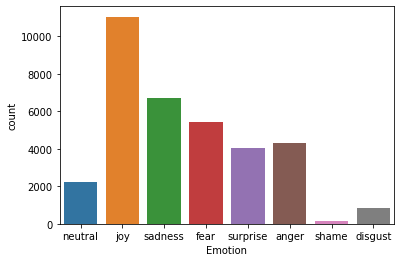

In [ ]:
sns.countplot(x='Emotion',data=df)

In [ ]:
# User handles and stopwords
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df.head()

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...


In [ ]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
# Split Data 
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)


In [ ]:
# Pipeline
from sklearn.pipeline import Pipeline
#Logistic regression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])


In [ ]:
#Train and fit data
pipe_lr.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6200421536692853

In [ ]:
# Let's make an example
example="After driving I felt peace"

In [ ]:
pipe_lr.predict([example])

array(['joy'], dtype=object)

In [ ]:
# Prediction Probability
pipe_lr.predict_proba([example])

array([[0.01448961, 0.00154465, 0.09350751, 0.56933103, 0.02010583,
        0.2974097 , 0.00220368, 0.00140799]])

In [ ]:
# To know classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
# Saving Model and pipeline 
import joblib
pipeline_file = open("Model_saved.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [36]:
from google.colab import files
files.download('/content/Model_saved.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>